255


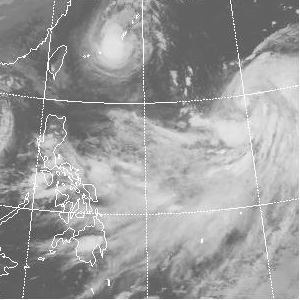

In [158]:
import numpy as np
from PIL import Image
from sklearn import preprocessing

'''
先將影像切成正方形的，再進行resize
'''


image_paths = ['C:/Users/PhycauseStudio/Documents/GitHub/TW_typhoon/data/train/low/Satellite_IR1_LCC.200009080900.jpg']

new_width = 100
new_height = 100
tiny_images_ori = []

for img_file in image_paths:
    img = Image.open(img_file)
    #取得圖片的大小
    width, height = img.size
    
    #計算切割的大小
    new_length = 300
    img_array = np.asarray(img)
    img_array.flags['WRITEABLE'] = True
    print(np.max(img_array))
    for idx_i, i in enumerate(img_array):
        for idx_j,j in enumerate(i):
            if j < 1:
                img_array[idx_i,idx_j] = 0
    raw_start = 0
    
    bright_val_array = []
    while raw_start <= 512 - new_length:
        col_start = 0
        if raw_start >= 175:
            while col_start <= 512 - new_length:
                if col_start >= 175:
                    bright_val = 0
#                     for idx_i, i in enumerate(img_array):
#                         for idx_j, j in enumerate(img_array):
#                             if idx_i in range (raw_start, raw_start + new_length) and idx_j in range(col_start, col_start + new_length):
#                                 bright_val += img_array[idx_i][idx_j]
                    bright_val = np.sum(img_array[raw_start:raw_start + new_length,col_start:col_start + new_length])
                    bright_val_array.append([raw_start, col_start, bright_val])
                col_start += 1
        raw_start += 1
    bright_val_array = np.array(bright_val_array)
    max_bval_idx_x = bright_val_array[np.argmax(bright_val_array[:,2])][1] + new_length/2 - 256
    max_bval_idx_y = bright_val_array[np.argmax(bright_val_array[:,2])][0] + new_length/2 - 256
    img_thred = Image.fromarray(img_array)
    
    #計算要切的範圍(以圖片中心為切割中心)
    left = (width - new_length)/2 + max_bval_idx_x
    top = (height - new_length)/2 + max_bval_idx_y
    right = (width + new_length)/2 + max_bval_idx_x
    bottom = (height + new_length)/2 + max_bval_idx_y
    img_cropped = img_thred.crop((left, top, right, bottom))
    
    
    #resize圖片大小
    img_resized = img_cropped.resize((new_width, new_height), Image.BILINEAR)
    
#     #將調整過後的圖片轉成float32存入tiny_images
#     tiny_images_ori.append(np.asarray(img_resized,dtype='float32').flatten().tolist())
    
# tiny_images = np.array(tiny_images_ori)
# tiny_images_T = np.transpose(tiny_images)

# for idx, feature in enumerate(tiny_images_T):
#     feature_scaled = preprocessing.scale(feature,with_std = False)
#     feature_scaled = feature_scaled/np.max(abs(feature_scaled))
#     tiny_images[:,idx] = feature_scaled
img_cropped

In [136]:
a = np.array(bright_val_array)
a[np.argmax(a[:,2])][0]


211

In [142]:
t = np.array([[1.0,2.0,3.0,3.5],[3.5, 5.0, 6.0, 8.0],[0,11.0,12.0,14.0]])
t_T = np.transpose(t)

for idx, feature in enumerate(t_T):
    feature_scaled = preprocessing.scale(feature,with_std = False)
    feature_scaled = feature_scaled/np.max(abs(feature_scaled))
    t[:,idx] = feature_scaled
print(t)

[[-0.25       -0.8        -0.8        -0.90909091]
 [ 1.         -0.2        -0.2        -0.09090909]
 [-0.75        1.          1.          1.        ]]


In [9]:
import pickle
import numpy as np

with open("vocab.pkl",'rb') as file:
    vocab = pickle.load(file)
vocab = np.array(vocab)
np.shape(vocab)

(400, 128)

In [72]:
a = [[1,2,3],[4,5,6],[7,8,9]]
val = 0
for idx_i, i in enumerate(a):
    for idx_j, j in enumerate(a):
        if idx_i in range (1, 3) and idx_j in range(1, 3):
            val += a[idx_i][idx_j]
print(val)        

28


In [68]:
if 4 in range(2,4):
    print('ddd')